<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D1%83%D1%80%D0%BE%D0%B2%D0%BD%D1%8F_A2%20%D1%81%20Unmatched%20Lemmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd

7.203196347031963


<ipython-input-23-5be5255d2360>:118: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


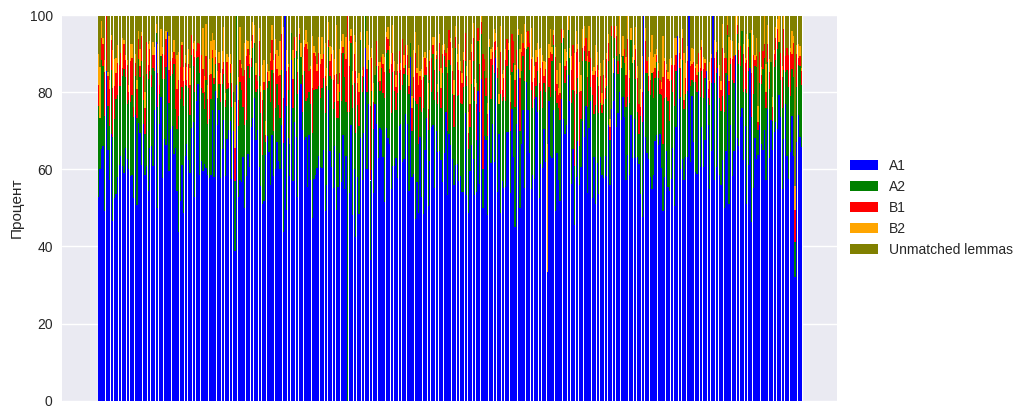

In [23]:
import glob
import os
from pymystem3 import Mystem
import string
import csv
import matplotlib.pyplot as plt
import numpy as np

mystem = Mystem()

# Folder path with students' texts
students_path = r"/content/Students_texts"
text_contents = {}

# List to store the number of unique lemmas for each text
x_data = []

for text_path in glob.glob(students_path + "/*.txt"):
    with open(text_path, "r", encoding='utf-8') as file:
        file_name = os.path.basename(text_path)  # The keys are file names
        text = file.read()
        lemmas = [lemma for lemma in mystem.lemmatize(text)
                  if lemma.strip() and not all(c in string.punctuation or c.isspace() for c in lemma)
                  and not any(c.isalpha() and ord(c) < 128 for c in lemma)]
        lemmas = list(set(lemmas))
        x_data.append(len(lemmas))
        text_contents[file_name] = lemmas

# Load frequency dictionary for each thousand words
df = pd.read_csv('ru_m3.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
df = df[['Lemma', 'CEFR']]
mark1 = "a1"
mark2 = "a2"
mark3 = "b1"
mark4 = "b2"
mark5 = "A1"
mark6 = "A2"
mark7 = "B1"
mark8 = "B2"
dc1 = df.query('CEFR == @mark1 | CEFR == @mark5')
dc2 = df.query('CEFR == @mark2 | CEFR == @mark6')
dc3 = df.query('CEFR == @mark3 | CEFR == @mark7')
dc4 = df.query('CEFR == @mark4 | CEFR == @mark8')

l = []
for word in dc1['Lemma']:
    if word not in l:
        l.append(word)
slovar1 = l

l = []
for word in dc2['Lemma']:
    if word not in l:
        l.append(word)
slovar2 = l

l = []
for word in dc3['Lemma']:
    if word not in l:
        l.append(word)
slovar3 = l

l = []
for word in dc4['Lemma']:
    if word not in l:
        l.append(word)
slovar4 = l

# Matching lemmas for each level
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

# Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

# Calculate the percentage of matched lemmas for each level
total_words = np.array(x_data)
percentages_1 = np.array(y_data_1) / total_words * 100
percentages_2 = np.array(y_data_2) / total_words * 100
percentages_3 = np.array(y_data_3) / total_words * 100
percentages_4 = np.array(y_data_4) / total_words * 100
percentages_5 = np.array(y_data_5) / total_words * 100

# Calculate the average of Unmatched Lemmas
average_unmatched_lemmas = np.mean(y_data_5)
print(average_unmatched_lemmas)

# Построим столбчатую диаграмму без меток количества слов и процентов
colors = ['blue', 'green', 'red', 'orange', 'olive']

plt.figure(figsize=(10, 5))
plt.style.use('seaborn')

plt.bar(range(len(y_data_1)), percentages_1, color=colors[0], label=labels[0])
plt.bar(range(len(y_data_1)), percentages_2, bottom=percentages_1, color=colors[1], label=labels[1])
plt.bar(range(len(y_data_1)), percentages_3, bottom=np.add(percentages_1, percentages_2), color=colors[2], label=labels[2])
plt.bar(range(len(y_data_1)), percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color=colors[3], label=labels[3])
plt.bar(range(len(y_data_1)), percentages_5, bottom=np.add(np.add(np.add(percentages_1, percentages_2), percentages_3), percentages_4),
        color=colors[4], label=labels[4])

plt.xticks(range(len(y_data_1)), [])  # Удаляем метки по оси X
plt.ylabel('Процент')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

In [24]:
df = pd.read_csv('lemmas_levels.csv', sep=',')
df.index = np.arange(1, len(df) + 1)
mark1 = "1E"
mark2 = "2I"
mark3 = "3AU"
mark4 = "4S"
ll1 = df.query('level == @mark1')
ll2 = df.query('level == @mark2')
ll3 = df.query('level == @mark3')
ll4 = df.query('level == @mark4')

In [25]:
slovar1 = ll1['lemma'].str.strip('\'').tolist()
slovar2 = ll2['lemma'].str.strip('\'').tolist()
slovar3 = ll3['lemma'].str.strip('\'').tolist()
slovar4 = ll4['lemma'].str.strip('\'').tolist()

7.2853881278538815


<ipython-input-26-0915a2ab57a9>:49: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


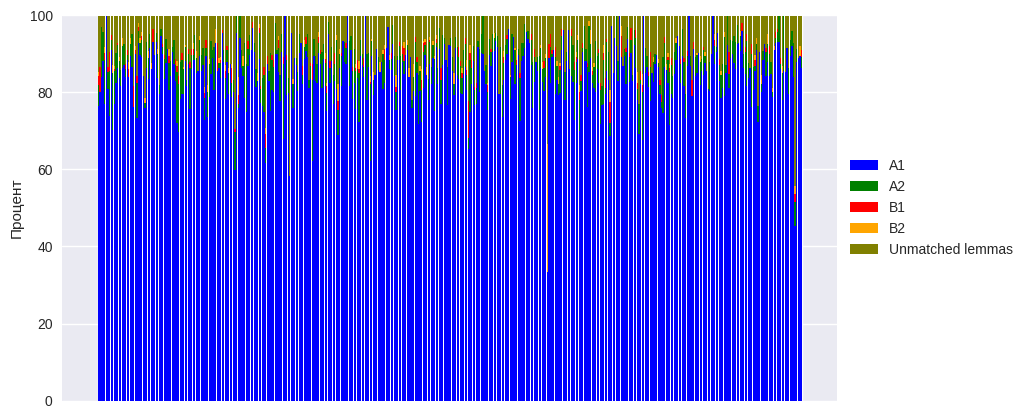

In [26]:
# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

#Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

# Calculate the percentage of matched lemmas for each level
total_words = np.array(x_data)
percentages_1 = np.array(y_data_1) / total_words * 100
percentages_2 = np.array(y_data_2) / total_words * 100
percentages_3 = np.array(y_data_3) / total_words * 100
percentages_4 = np.array(y_data_4) / total_words * 100
percentages_5 = np.array(y_data_5) / total_words * 100

# Calculate the average of Unmatched Lemmas
average_unmatched_lemmas = np.mean(y_data_5)
print(average_unmatched_lemmas)

# Построим столбчатую диаграмму без меток количества слов и процентов
colors = ['blue', 'green', 'red', 'orange', 'olive']

plt.figure(figsize=(10, 5))
plt.style.use('seaborn')

plt.bar(range(len(y_data_1)), percentages_1, color=colors[0], label=labels[0])
plt.bar(range(len(y_data_1)), percentages_2, bottom=percentages_1, color=colors[1], label=labels[1])
plt.bar(range(len(y_data_1)), percentages_3, bottom=np.add(percentages_1, percentages_2), color=colors[2], label=labels[2])
plt.bar(range(len(y_data_1)), percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color=colors[3], label=labels[3])
plt.bar(range(len(y_data_1)), percentages_5, bottom=np.add(np.add(np.add(percentages_1, percentages_2), percentages_3), percentages_4),
        color=colors[4], label=labels[4])

plt.xticks(range(len(y_data_1)), [])  # Удаляем метки по оси X
plt.ylabel('Процент')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

In [27]:
df = pd.read_csv('A1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
A1 = df[:754]

In [28]:
df = pd.read_csv('A2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
A2 = df[:1048]

In [29]:
df = pd.read_csv('B1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
B1 = df[:1081]

In [30]:
df = pd.read_csv('B2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
B2 = df[:3331]

In [31]:
slovar1 = A1['Lemma'].str.lower().tolist()
slovar2 = A2['Unnamed: 0'].str.lower().tolist()
slovar3 = B1['Lemma'].str.lower().tolist()
slovar4 = B2['Lemma'].str.lower().tolist()

28.376712328767123


<ipython-input-32-0915a2ab57a9>:49: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


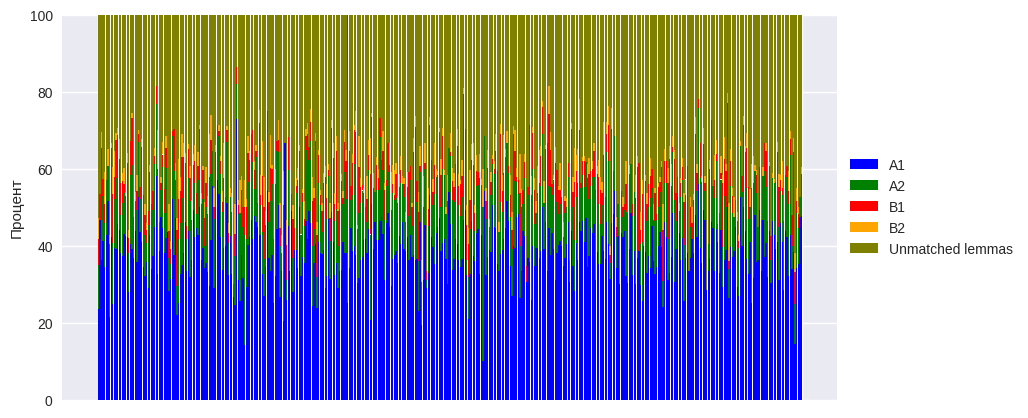

In [32]:
# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

#Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

# Calculate the percentage of matched lemmas for each level
total_words = np.array(x_data)
percentages_1 = np.array(y_data_1) / total_words * 100
percentages_2 = np.array(y_data_2) / total_words * 100
percentages_3 = np.array(y_data_3) / total_words * 100
percentages_4 = np.array(y_data_4) / total_words * 100
percentages_5 = np.array(y_data_5) / total_words * 100

# Calculate the average of Unmatched Lemmas
average_unmatched_lemmas = np.mean(y_data_5)
print(average_unmatched_lemmas)

# Построим столбчатую диаграмму без меток количества слов и процентов
colors = ['blue', 'green', 'red', 'orange', 'olive']

plt.figure(figsize=(10, 5))
plt.style.use('seaborn')

plt.bar(range(len(y_data_1)), percentages_1, color=colors[0], label=labels[0])
plt.bar(range(len(y_data_1)), percentages_2, bottom=percentages_1, color=colors[1], label=labels[1])
plt.bar(range(len(y_data_1)), percentages_3, bottom=np.add(percentages_1, percentages_2), color=colors[2], label=labels[2])
plt.bar(range(len(y_data_1)), percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color=colors[3], label=labels[3])
plt.bar(range(len(y_data_1)), percentages_5, bottom=np.add(np.add(np.add(percentages_1, percentages_2), percentages_3), percentages_4),
        color=colors[4], label=labels[4])

plt.xticks(range(len(y_data_1)), [])  # Удаляем метки по оси X
plt.ylabel('Процент')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

In [33]:
df = pd.read_csv('new_vocab_a1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv1 = df

In [34]:
df = pd.read_csv('new_vocab_a2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv2 = df

In [35]:
df = pd.read_csv('new_vocab_b1.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv3 = df

In [36]:
df = pd.read_csv('new_vocab_b2.csv', sep=';')
df.index = np.arange(1, len(df) + 1)
i = 1
for word in df['а']:
  if len(word) < 2:
    df.drop(index = i, inplace = True)
  else:
    i += 1
nv4 = df

In [37]:
slovar1 = nv1['а'].str.lower().tolist()
data8 = nv2['а'].str.lower().tolist()
slovar2 = list(set(data8) - set(slovar1))
data7 = nv3['а'].str.lower().tolist()
slovar3 = list(set(data7) - set(data8))
data6 = nv4['а'].str.lower().tolist()
slovar4 = list(set(data6) - set(data7))

6.739726027397261


<ipython-input-38-0915a2ab57a9>:49: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


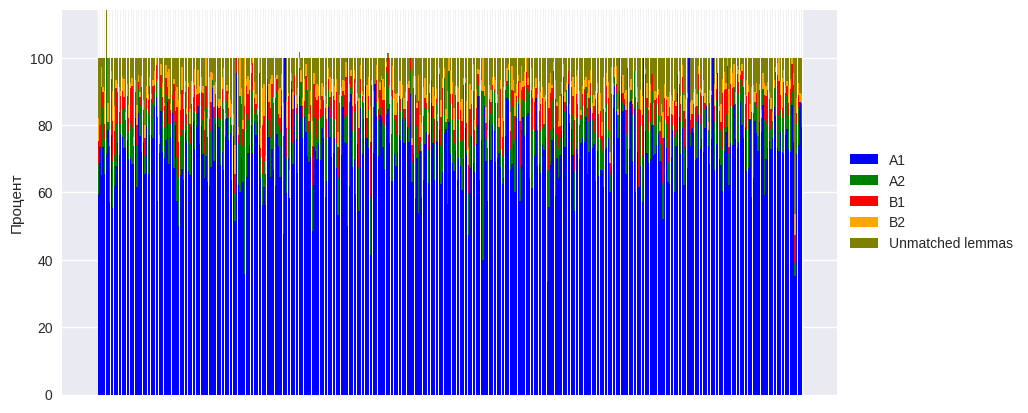

In [38]:
# Matching lemmas для каждого уровня
y_data_1 = []
y_data_2 = []
y_data_3 = []
y_data_4 = []

for file_name, lines in text_contents.items():
    lv1 = 0
    lv2 = 0
    lv3 = 0
    lv4 = 0
    for i in lines:
        if i in slovar1:
            lv1 += 1
        if i in slovar2:
            lv2 += 1
        if i in slovar3:
            lv3 += 1
        if i in slovar4:
            lv4 += 1
    y_data_1.append(lv1)
    y_data_2.append(lv2)
    y_data_3.append(lv3)
    y_data_4.append(lv4)

#Unmatched lemmas
y_data_5 = []

for i in range(len(y_data_1)):
    diff = x_data[i] - y_data_1[i] - y_data_2[i] - y_data_3[i] - y_data_4[i]
    y_data_5.append(diff)

# Calculate the percentage of matched lemmas for each level
total_words = np.array(x_data)
percentages_1 = np.array(y_data_1) / total_words * 100
percentages_2 = np.array(y_data_2) / total_words * 100
percentages_3 = np.array(y_data_3) / total_words * 100
percentages_4 = np.array(y_data_4) / total_words * 100
percentages_5 = np.array(y_data_5) / total_words * 100

# Calculate the average of Unmatched Lemmas
average_unmatched_lemmas = np.mean(y_data_5)
print(average_unmatched_lemmas)

# Построим столбчатую диаграмму без меток количества слов и процентов
colors = ['blue', 'green', 'red', 'orange', 'olive']

plt.figure(figsize=(10, 5))
plt.style.use('seaborn')

plt.bar(range(len(y_data_1)), percentages_1, color=colors[0], label=labels[0])
plt.bar(range(len(y_data_1)), percentages_2, bottom=percentages_1, color=colors[1], label=labels[1])
plt.bar(range(len(y_data_1)), percentages_3, bottom=np.add(percentages_1, percentages_2), color=colors[2], label=labels[2])
plt.bar(range(len(y_data_1)), percentages_4, bottom=np.add(np.add(percentages_1, percentages_2), percentages_3), color=colors[3], label=labels[3])
plt.bar(range(len(y_data_1)), percentages_5, bottom=np.add(np.add(np.add(percentages_1, percentages_2), percentages_3), percentages_4),
        color=colors[4], label=labels[4])

plt.xticks(range(len(y_data_1)), [])  # Удаляем метки по оси X
plt.ylabel('Процент')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

In [39]:
import os

students_path = "/content/Students_texts"

# Получаем список всех файлов в директории /content/Students_texts
file_list = os.listdir(students_path)

# Удаляем каждый файл из списка
for file_name in file_list:
    file_path = os.path.join(students_path, file_name)
    os.remove(file_path)

print("Все файлы в /content/Students_texts удалены.")

Все файлы в /content/Students_texts удалены.
